<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/AucRocCurveFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

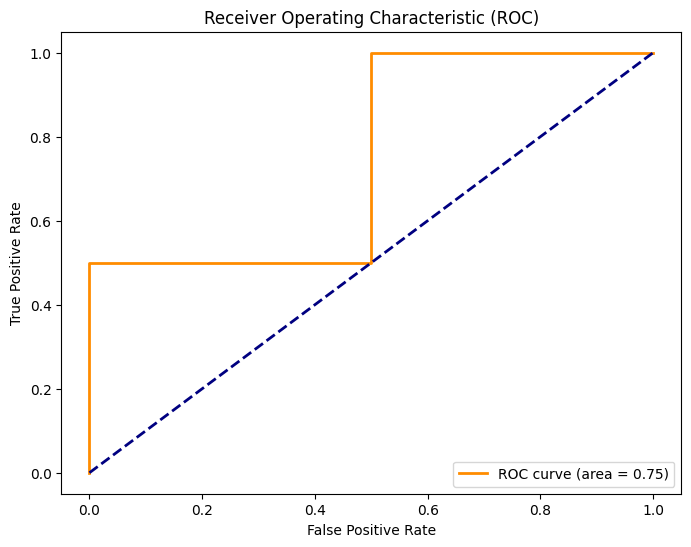

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class CustomROC:
    def __init__(self, y_true, y_probs):
        self.y_true = np.array(y_true)
        self.y_probs = np.array(y_probs)
        self.fpr = []
        self.tpr = []
        self.auc = 0.0

    def compute_roc(self, steps=100):
        # Generate thresholds from 1.0 down to 0.0
        thresholds = np.linspace(1.0, 0.0, steps)

        for t in thresholds:
            y_pred = (self.y_probs >= t).astype(int)

            tp = np.sum((y_pred == 1) & (self.y_true == 1))
            fp = np.sum((y_pred == 1) & (self.y_true == 0))
            fn = np.sum((y_pred == 0) & (self.y_true == 1))
            tn = np.sum((y_pred == 0) & (self.y_true == 0))

            tpr_val = tp / (tp + fn) if (tp + fn) > 0 else 0
            fpr_val = fp / (fp + tn) if (fp + tn) > 0 else 0

            self.tpr.append(tpr_val)
            self.fpr.append(fpr_val)

        self.auc = self._calculate_auc()
        return self.fpr, self.tpr, self.auc

    def _calculate_auc(self):
        # Using Trapezoidal Rule: sum((y1 + y2)/2 * (x2 - x1))
        area = 0.0
        for i in range(len(self.fpr) - 1):
            area += (self.tpr[i] + self.tpr[i+1]) * (self.fpr[i+1] - self.fpr[i]) / 2
        return abs(area)

    def plot(self):
        plt.figure(figsize=(8, 6))
        plt.plot(self.fpr, self.tpr, color='darkorange', lw=2, label=f'ROC curve (area = {self.auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()

# Example Usage:
y_true_example = [0, 0, 1, 1]
y_scores_example = [0.1, 0.4, 0.35, 0.8]

roc = CustomROC(y_true_example, y_scores_example)
roc.compute_roc()
roc.plot()
